In [6]:
#Importing the essential library for starters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Connecting Repository
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [11]:
#Data Display
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [13]:
#check for the missing values
df.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [14]:
from datetime import datetime
# converts dates columns to datetime 
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [15]:
# Calculate current date for reference
new_date = datetime.now()

In [16]:
# Fill missing Date_of_Churn with current date for active users
df['Date_of_Churn'] = df['Date_of_Churn'].fillna(new_date)


In [17]:
# Calculate subscription duration in months by substracting date_of_churn with subscription_start_date divides with function timedelta and constraint of 30 days and rounds to nearst.
df['Subscription_between_Months'] = ((df['Date_of_Churn'] - df['Subscription_Start_Date']) / pd.Timedelta(days=30)).round()


In [18]:
# Handle Reason_for_Churn missing values
df['Reason_for_Churn'] = df['Reason_for_Churn'].fillna('Not Churned')


In [19]:
# Check data types for each of variabless
print(df.dtypes)

User_ID                                 int64
Age                                     int64
Gender                                 object
Location                               object
Subscription_Start_Date        datetime64[ns]
Subscription_Type                      object
Monthly_Payment                       float64
Payment_Method                         object
Monthly_Hours_Watched                 float64
Favorite_Genre                         object
Devices_Used                           object
Average_Session_Length                float64
Content_ID                              int64
Rating_Given                            int64
Churned                                 int64
Date_of_Churn                  datetime64[ns]
Reason_for_Churn                       object
Subscription_between_Months           float64
dtype: object


In [20]:
# ensures that there is no misssing values.
print(df.isna().sum())

User_ID                        0
Age                            0
Gender                         0
Location                       0
Subscription_Start_Date        0
Subscription_Type              0
Monthly_Payment                0
Payment_Method                 0
Monthly_Hours_Watched          0
Favorite_Genre                 0
Devices_Used                   0
Average_Session_Length         0
Content_ID                     0
Rating_Given                   0
Churned                        0
Date_of_Churn                  0
Reason_for_Churn               0
Subscription_between_Months    0
dtype: int64


In [21]:
# Descriptive statistics for numerical features and outlines the following values of the tables.
print( df.describe())

           User_ID          Age        Subscription_Start_Date  \
count  1000.000000  1000.000000                           1000   
mean    500.500000    44.385000  2021-09-18 17:08:01.662466560   
min       1.000000    18.000000     2019-05-10 01:53:37.659073   
25%     250.750000    31.750000  2020-05-15 19:53:37.664891136   
50%     500.500000    45.000000  2021-08-21 01:53:37.662536448   
75%     750.250000    57.000000  2023-01-09 07:53:37.664328192   
max    1000.000000    70.000000     2024-05-06 01:53:37.662112   
std     288.819436    15.321669                            NaN   

       Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
count      1000.000000            1000.000000             1000.000000   
mean         14.580000              19.071653                1.893771   
min           9.990000               0.041574                0.000486   
25%           9.990000               5.490739                0.548918   
50%          14.990000              13.3

In [22]:
# Descriptive statistics for categorical features
print(df.describe(include=['object', 'category']))

       Gender Location Subscription_Type Payment_Method Favorite_Genre  \
count    1000     1000              1000           1000           1000   
unique      3        5                 3              3              5   
top     Other     West          Standard    Credit Card          Drama   
freq      336      216               530            613            212   

       Devices_Used Reason_for_Churn  
count          1000             1000  
unique            4                5  
top          Mobile      Not Churned  
freq            408              754  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


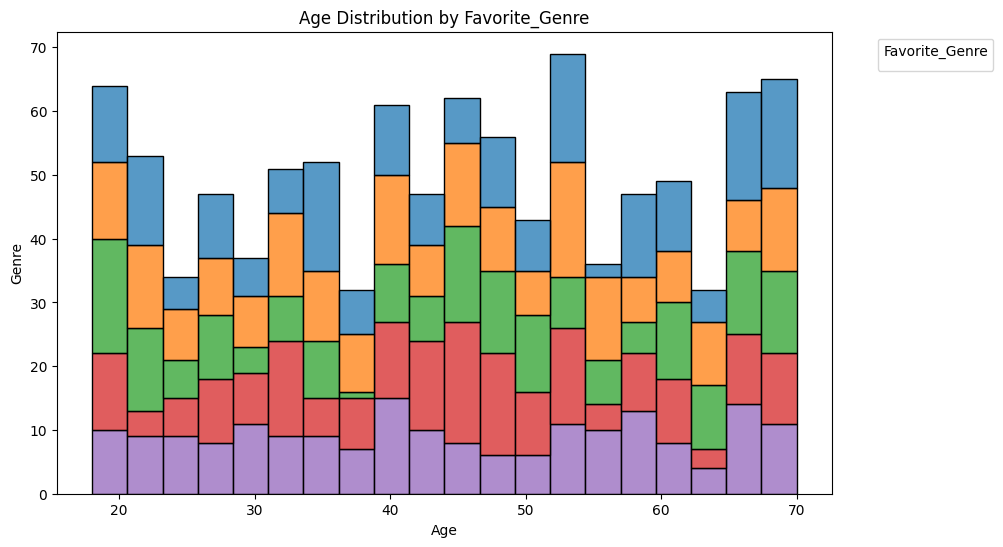

In [23]:
numerical_values = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Subscription_between_Months']
categorical_value = 'Favorite_Genre'

# Create histograms with hue for each numerical value
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Favorite_Genre', multiple='stack', bins=20)
plt.title('Age Distribution by Favorite_Genre')
plt.xlabel('Age')
plt.ylabel('Genre')
plt.legend(title='Favorite_Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

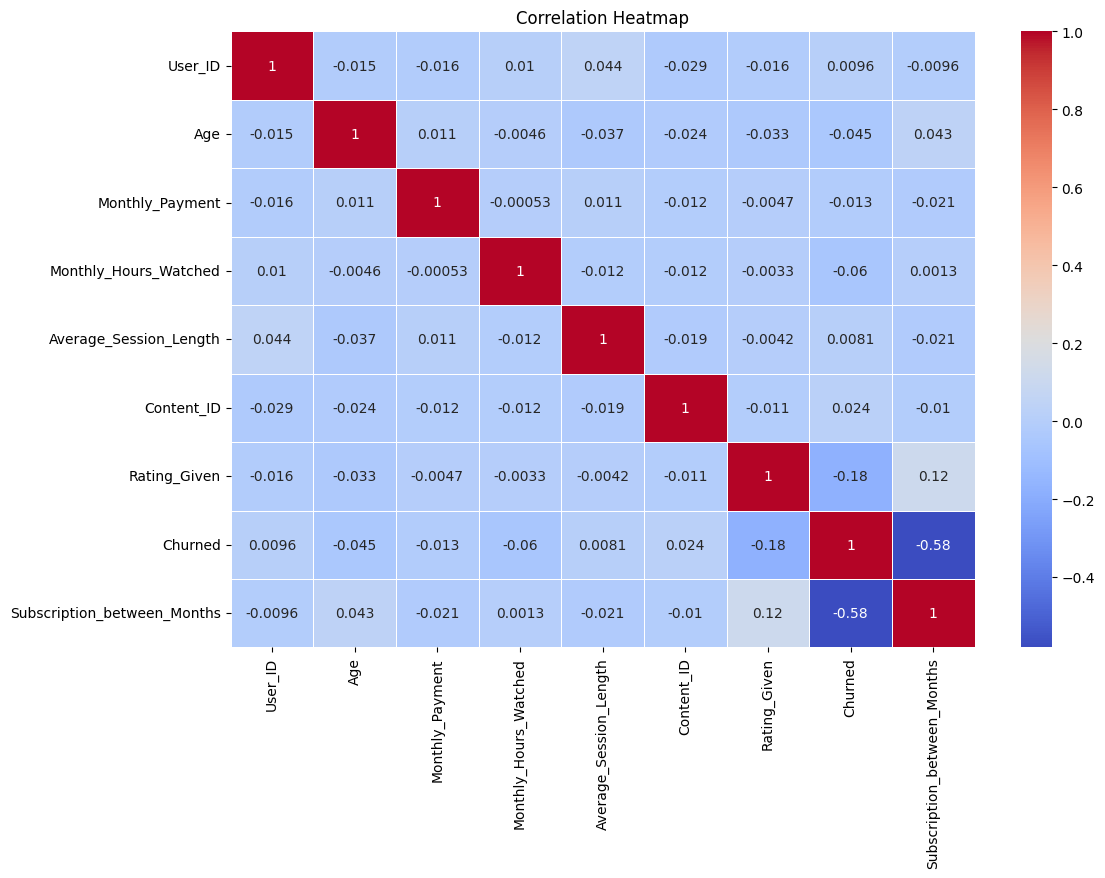

In [27]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

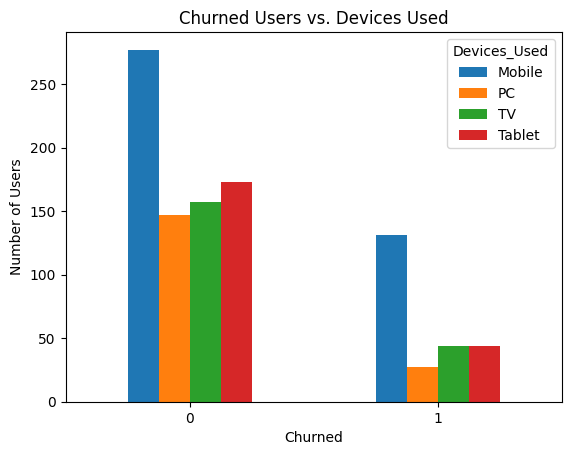

In [28]:
# Creating a crosstab of the churned users and their devices used
churned_devices = pd.crosstab(df['Churned'], df['Devices_Used'])

# Ploting it as a bar chart
churned_devices.plot(kind='bar')

# Adding title to the x and y axis labels
plt.title('Churned Users vs. Devices Used')
plt.xlabel('Churned')
plt.ylabel('Number of Users')

# Rotating x axis labels for horizontally
plt.xticks(rotation=0)

# Displaing the plot
plt.show()

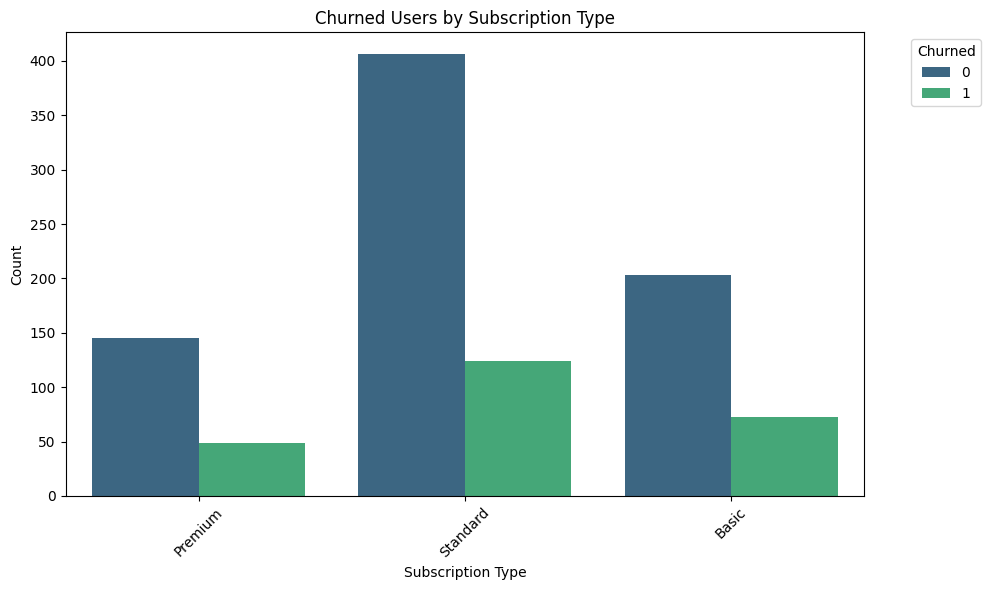

In [39]:
#Creating a plot for Suscription_Type

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription_Type', hue='Churned', palette='viridis')
plt.title('Churned Users by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churned', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
